In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

## 1) 載入資料集
此範例採用鳶尾花朵資料集進行資料前處理

In [125]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

ex:

|  Iris-setosa |  Iris-versicolor | Iris-virginica  |
|:---:|:---:|:---:|
|  1 | 2  | 3  |

In [126]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_train['Species']中。
df_train['Class'] = df_train['Species'].map(label_map)

In [127]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## 3) 切割訓練集與測試集

- X_train、y_train 當作是訓練模型所用的資料
- X_test、y_test 當作是模型落地後實際場域收到的數值

In [128]:
from sklearn.utils import shuffle
# 首先我們先將這150筆資料打亂重新排序一下
df_train = shuffle(df_train, random_state=4)

In [129]:
# 輸入
X = df_train.drop(labels=['Species','Class'],axis=1).values # 移除Species (因為字母不參與訓練)
# 輸出
y = df_train['Class'].values

In [130]:
X_train = X[:100]
y_train = y[:100]
X_test = X[100:]
y_test = X[100:]

In [131]:
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (100, 4)
Testing data shape: (50, 4)


## 資料前處理

In [132]:
import numpy as np
# 顯示完整的精確度
np.set_printoptions(suppress=True) 

## Standardization 平均&變異數標準化

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scaled之後的資料零均值，單位方差  
print('資料集 X_train 的平均值 : ', X_train.mean(axis=0))
print('資料集 X_train 的標準差 : ', X_train.std(axis=0))

print('\nStandardScaler 縮放過後資料集 X_train 的平均值 : ', X_train_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X_train 的標準差 : ', X_train_scaled.std(axis=0))

資料集 X_train 的平均值 :  [5.827 3.035 3.742 1.194]
資料集 X_train 的標準差 :  [0.78049407 0.43066809 1.75272245 0.76181625]

StandardScaler 縮放過後資料集 X_train 的平均值 :  [-0. -0. -0.  0.]
StandardScaler 縮放過後資料集 X_train 的標準差 :  [1. 1. 1. 1.]


[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

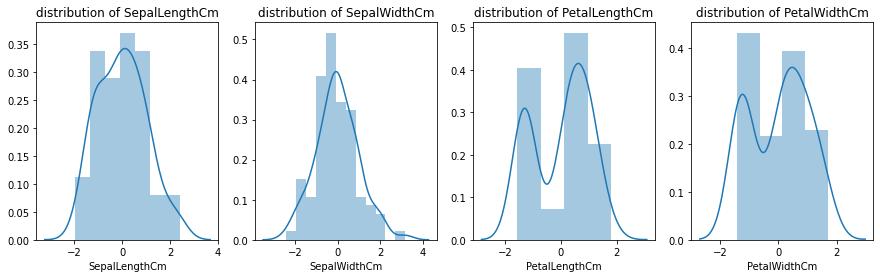

In [134]:
# 檢視資料處理後的分布狀態
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.distplot(X_train_scaled[:,0],ax=axes[0])
sns.distplot(X_train_scaled[:,1],ax=axes[1])
sns.distplot(X_train_scaled[:,2],ax=axes[2])
sns.distplot(X_train_scaled[:,3],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")

## 儲存Scalar
輸出以 X_train 為基準的 Scalar

In [135]:
from pickle import dump

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

## 載入Scalar
載入以 X_train 為基準的 Scalar
當有新的資料要測試時，資料前處理可以載入先前轉換好的Scalar直接進行transform

In [120]:
from pickle import load

# load the scaler
myScaler = load(open('scaler.pkl', 'rb'))

#### 驗證載入的Scalar在訓練資料集的轉換
可以發現透過 pickle 載入 scaler.pkl 轉換後的 X_train 平均值與標準差分別為 0 與 1。跟先前一模一樣，此步驟是確保先前 fit 的 StandardScaler參數是否有缺失。

In [121]:
X_train_scaled = myScaler.transform(X_train)

# scaled之後的資料零均值，單位方差  
print('資料集 X_train 的平均值 : ', X_train.mean(axis=0))
print('資料集 X_train 的標準差 : ', X_train.std(axis=0))

print('\nStandardScaler 縮放過後資料集 X 的平均值 : ', X_train_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', X_train_scaled.std(axis=0))

資料集 X_train 的平均值 :  [5.827 3.035 3.742 1.194]
資料集 X_train 的標準差 :  [0.78049407 0.43066809 1.75272245 0.76181625]

StandardScaler 縮放過後資料集 X 的平均值 :  [-0. -0. -0.  0.]
StandardScaler 縮放過後資料集 X 的標準差 :  [1. 1. 1. 1.]


### 測試資料進行轉換
我們可以發現以 X_train 為基準的 Scaler 在測試資料集 X_test 中轉換後的平均值與標準差都分別趨近於 0 與 1。

In [122]:
X_test_scaled = myScaler.transform(X_test)

# scaled之後的資料零均值，單位方差  
print('資料集 X_test 的平均值 : ', X_test.mean(axis=0))
print('資料集 X_test 的標準差 : ', X_test.std(axis=0))

print('\nStandardScaler 縮放過後資料集 X 的平均值 : ', X_test_scaled.mean(axis=0))
print('StandardScaler 縮放過後資料集 X 的標準差 : ', X_test_scaled.std(axis=0))

資料集 X_test 的平均值 :  [5.876 3.092 3.792 1.208]
資料集 X_test 的標準差 :  [0.90742713 0.43259219 1.76961465 0.75811345]

StandardScaler 縮放過後資料集 X 的平均值 :  [0.06278075 0.13235251 0.02852705 0.01837713]
StandardScaler 縮放過後資料集 X 的標準差 :  [1.16263167 1.00446771 1.00963769 0.99513951]
